# GradientBoost 회귀 기본코드

## #01. 준비작업

### [1] 패키지 가져오기

In [1]:
# 연결된 모듈이 업데이트 되면 즉시 자동 로드함
%load_ext autoreload
%autoreload 2

from helper.util import *
from helper.plot import *
from helper.analysis import *
from helper.regression import *

from sklearn.ensemble import GradientBoostingRegressor

### [2] 데이터 가져오기


In [2]:
origin = my_read_excel("https://data.hossam.kr/mldata/boston.xlsx", info=False)


상위 5개 행
+----+---------+------+---------+--------+-------+-------+-------+--------+-------+-------+-----------+--------+---------+--------+
|    |    CRIM |   ZN |   INDUS |   CHAS |   NOX |    RM |   AGE |    DIS |   RAD |   TAX |   PTRATIO |      B |   LSTAT |   MEDV |
|----+---------+------+---------+--------+-------+-------+-------+--------+-------+-------+-----------+--------+---------+--------|
|  0 | 0.00632 |   18 |    2.31 |      0 | 0.538 | 6.575 |  65.2 |   4.09 |     1 |   296 |      15.3 |  396.9 |    4.98 |     24 |
|  1 | 0.02731 |    0 |    7.07 |      0 | 0.469 | 6.421 |  78.9 | 4.9671 |     2 |   242 |      17.8 |  396.9 |    9.14 |   21.6 |
|  2 | 0.02729 |    0 |    7.07 |      0 | 0.469 | 7.185 |  61.1 | 4.9671 |     2 |   242 |      17.8 | 392.83 |    4.03 |   34.7 |
|  3 | 0.03237 |    0 |    2.18 |      0 | 0.458 | 6.998 |  45.8 | 6.0622 |     3 |   222 |      18.7 | 394.63 |    2.94 |   33.4 |
|  4 | 0.06905 |    0 |    2.18 |      0 | 0.458 | 7.147 |  54.2 | 

### [3] 훈련/검증 데이터 분할 및 데이터 표준화


In [3]:
x_train, x_test, y_train, y_test = my_train_test_split(origin, "MEDV", scalling=True)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404,), (102,))

## #02. GradientBoost

### [1] 기본 모형 만들기

| 하이퍼 파라미터        | 기본값        | 설명                                                  | 추천사항                                    |
|--------------------|------------|-----------------------------------------------------|------------------------------------------|
| **`loss`**             | `squared_error` | 손실 함수. `{‘squared_error’, ‘absolute_error’, ‘huber’, ‘quantile’}` 제공.                   | 문제에 맞는 손실 함수 선택.                     |
| **`learning_rate`**    | `0.1`      | 학습률. 각 트리의 기여도 조절.                                  | 낮은 값 + 높은 `n_estimators` 조합 권장.         |
| **`n_estimators`**     | `100`      | 부스팅 단계 수. 트리의 개수.                                 | 너무 높으면 과적합. 적절한 값 탐색 필요.             |
| **`subsample`**        | `1.0`      | 훈련에 사용하는 샘플 비율. 스태깅 사용 시.                       | `1.0` 미만 값은 분산 감소 효과 있으나, 과적합 위험 감소.  |
| `criterion`        | `friedman_mse` | 트리 품질 측정 기준.<br/>`friedman_mse`(프리드먼의 MSE), `squared_error`중 선택        | 기본값 권장.                                  |
| `min_samples_split`| `2`        | 노드 분할 위한 최소 샘플 수.                                 | 과적합 방지를 위해 조정 가능.                       |
| `min_samples_leaf` | `1`        | 리프 노드가 되기 위한 최소 샘플 수.                            | 과적합 제어에 유용.                                |
| `max_depth`        | `3`        | 개별 회귀 추정기의 최대 깊이.                               | 깊이 크면 과적합 위험. 적절한 값 설정 중요.              |
| `max_features`     | `None`     | 최적 분할을 위해 고려할 최대 특성 수.                         | 특성 수의 제곱근 사용 권장. 과적합 방지.                |
| `random_state`     | `None`     | 난수 시드.                                            | 결과 재현을 위해 사용.                           |


[회귀분석 성능평가]
+-------------------------------+--------------+--------------+
|                               |   훈련데이터 |   검증데이터 |
|-------------------------------+--------------+--------------|
| 결정계수(R2)                  |     0.981984 |     0.781715 |
| 평균절대오차(MAE)             |     0.977258 |      2.67197 |
| 평균제곱오차(MSE)             |      1.53391 |      17.7746 |
| 평균오차(RMSE)                |      1.23851 |      4.21599 |
| 평균 절대 백분오차 비율(MAPE) |      5.10778 |      13.0712 |
| 평균 비율 오차(MPE)           |    -0.854174 |     -3.31315 |
+-------------------------------+--------------+--------------+

[학습곡선]


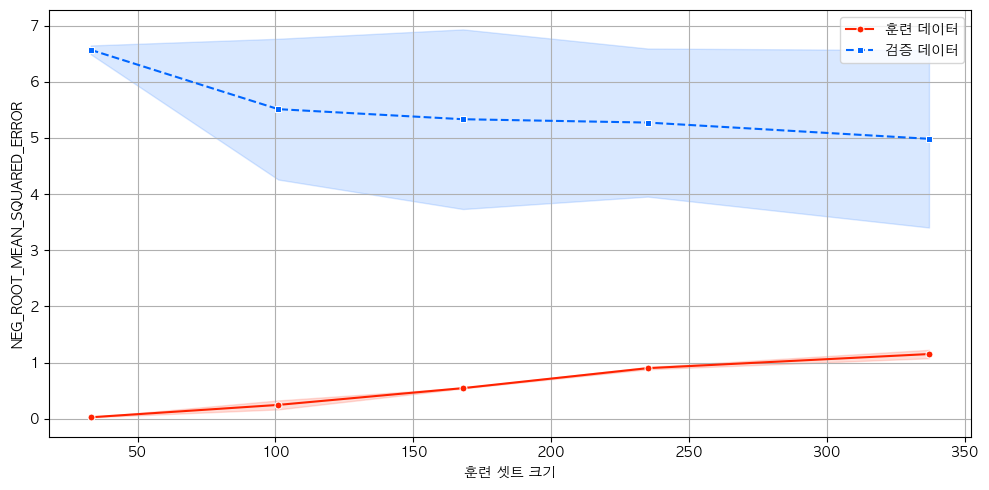

+----+------------+------------+---------+
|    | 종속변수   | 독립변수   |     VIF |
|----+------------+------------+---------|
|  0 | MEDV       | CRIM       | 2.09518 |
|  1 | MEDV       | ZN         | 2.33731 |
|  2 | MEDV       | INDUS      |  4.9238 |
|  3 | MEDV       | CHAS       | 1.32047 |
|  4 | MEDV       | NOX        | 4.17384 |
|  5 | MEDV       | RM         | 1.82706 |
|  6 | MEDV       | AGE        | 2.93317 |
|  7 | MEDV       | DIS        | 4.41185 |
|  8 | MEDV       | RAD        | 9.98804 |
|  9 | MEDV       | TAX        | 10.5503 |
| 10 | MEDV       | PTRATIO    | 1.88398 |
| 11 | MEDV       | B          |  1.5563 |
| 12 | MEDV       | LSTAT      |  2.8052 |
+----+------------+------------+---------+

CPU times: user 469 ms, sys: 802 ms, total: 1.27 s
Wall time: 1.27 s


In [4]:
%%time

gb = GradientBoostingRegressor(
        loss='squared_error',
        learning_rate=0.1,
        n_estimators=100,
        subsample=1,
        random_state=get_random_state())

gb.fit(X=x_train, y=y_train)

my_regression_result(estimator=gb, x_train=x_train, y_train=y_train, x_test=x_test, y_test=y_test)

my_regression_report(estimator=gb, x_train=x_train, y_train=y_train, x_test=x_test, y_test=y_test)

## #03. 모듈화 기능 확인

[교차검증 TOP5]
+----+----------------+-----------------+-------------------+
|    |   n_estimators |   learning_rate |   mean_test_score |
|----+----------------+-----------------+-------------------|
|  0 |             50 |             0.1 |           0.87347 |
|  1 |             20 |             0.1 |          0.830395 |
|  2 |             20 |               1 |          0.757529 |
|  3 |             50 |               1 |          0.755156 |
|  4 |             10 |             0.1 |          0.702359 |
+----+----------------+-----------------+-------------------+

[Best Params]
{'n_estimators': 50, 'learning_rate': 0.1}

[회귀분석 성능평가]
+-------------------------------+--------------+--------------+
|                               |   훈련데이터 |   검증데이터 |
|-------------------------------+--------------+--------------|
| 결정계수(R2)                  |      0.96774 |     0.761978 |
| 평균절대오차(MAE)             |      1.30228 |       2.7905 |
| 평균제곱오차(MSE)             |      2.74673 |      19.3818 |
|

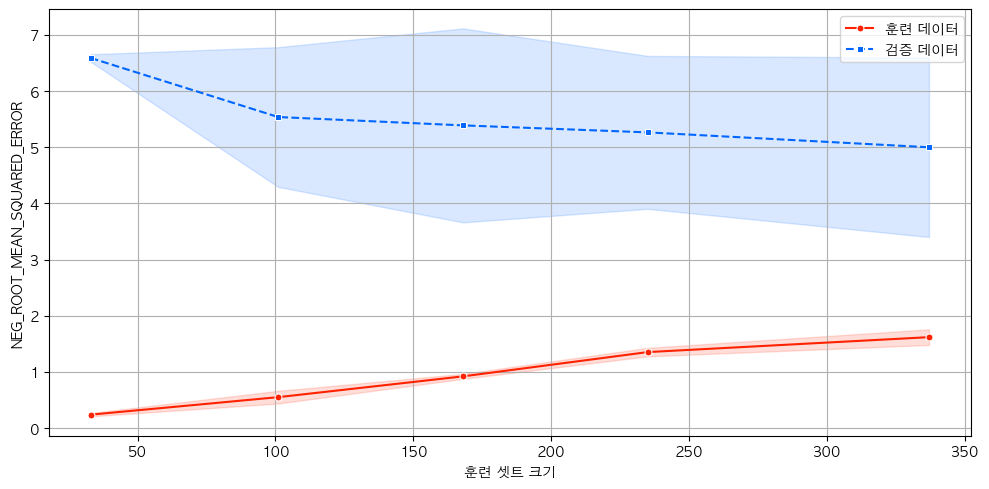


+----+------------+------------+---------+
|    | 종속변수   | 독립변수   |     VIF |
|----+------------+------------+---------|
|  0 | MEDV       | CRIM       | 2.09518 |
|  1 | MEDV       | ZN         | 2.33731 |
|  2 | MEDV       | INDUS      |  4.9238 |
|  3 | MEDV       | CHAS       | 1.32047 |
|  4 | MEDV       | NOX        | 4.17384 |
|  5 | MEDV       | RM         | 1.82706 |
|  6 | MEDV       | AGE        | 2.93317 |
|  7 | MEDV       | DIS        | 4.41185 |
|  8 | MEDV       | RAD        | 9.98804 |
|  9 | MEDV       | TAX        | 10.5503 |
| 10 | MEDV       | PTRATIO    | 1.88398 |
| 11 | MEDV       | B          |  1.5563 |
| 12 | MEDV       | LSTAT      |  2.8052 |
+----+------------+------------+---------+



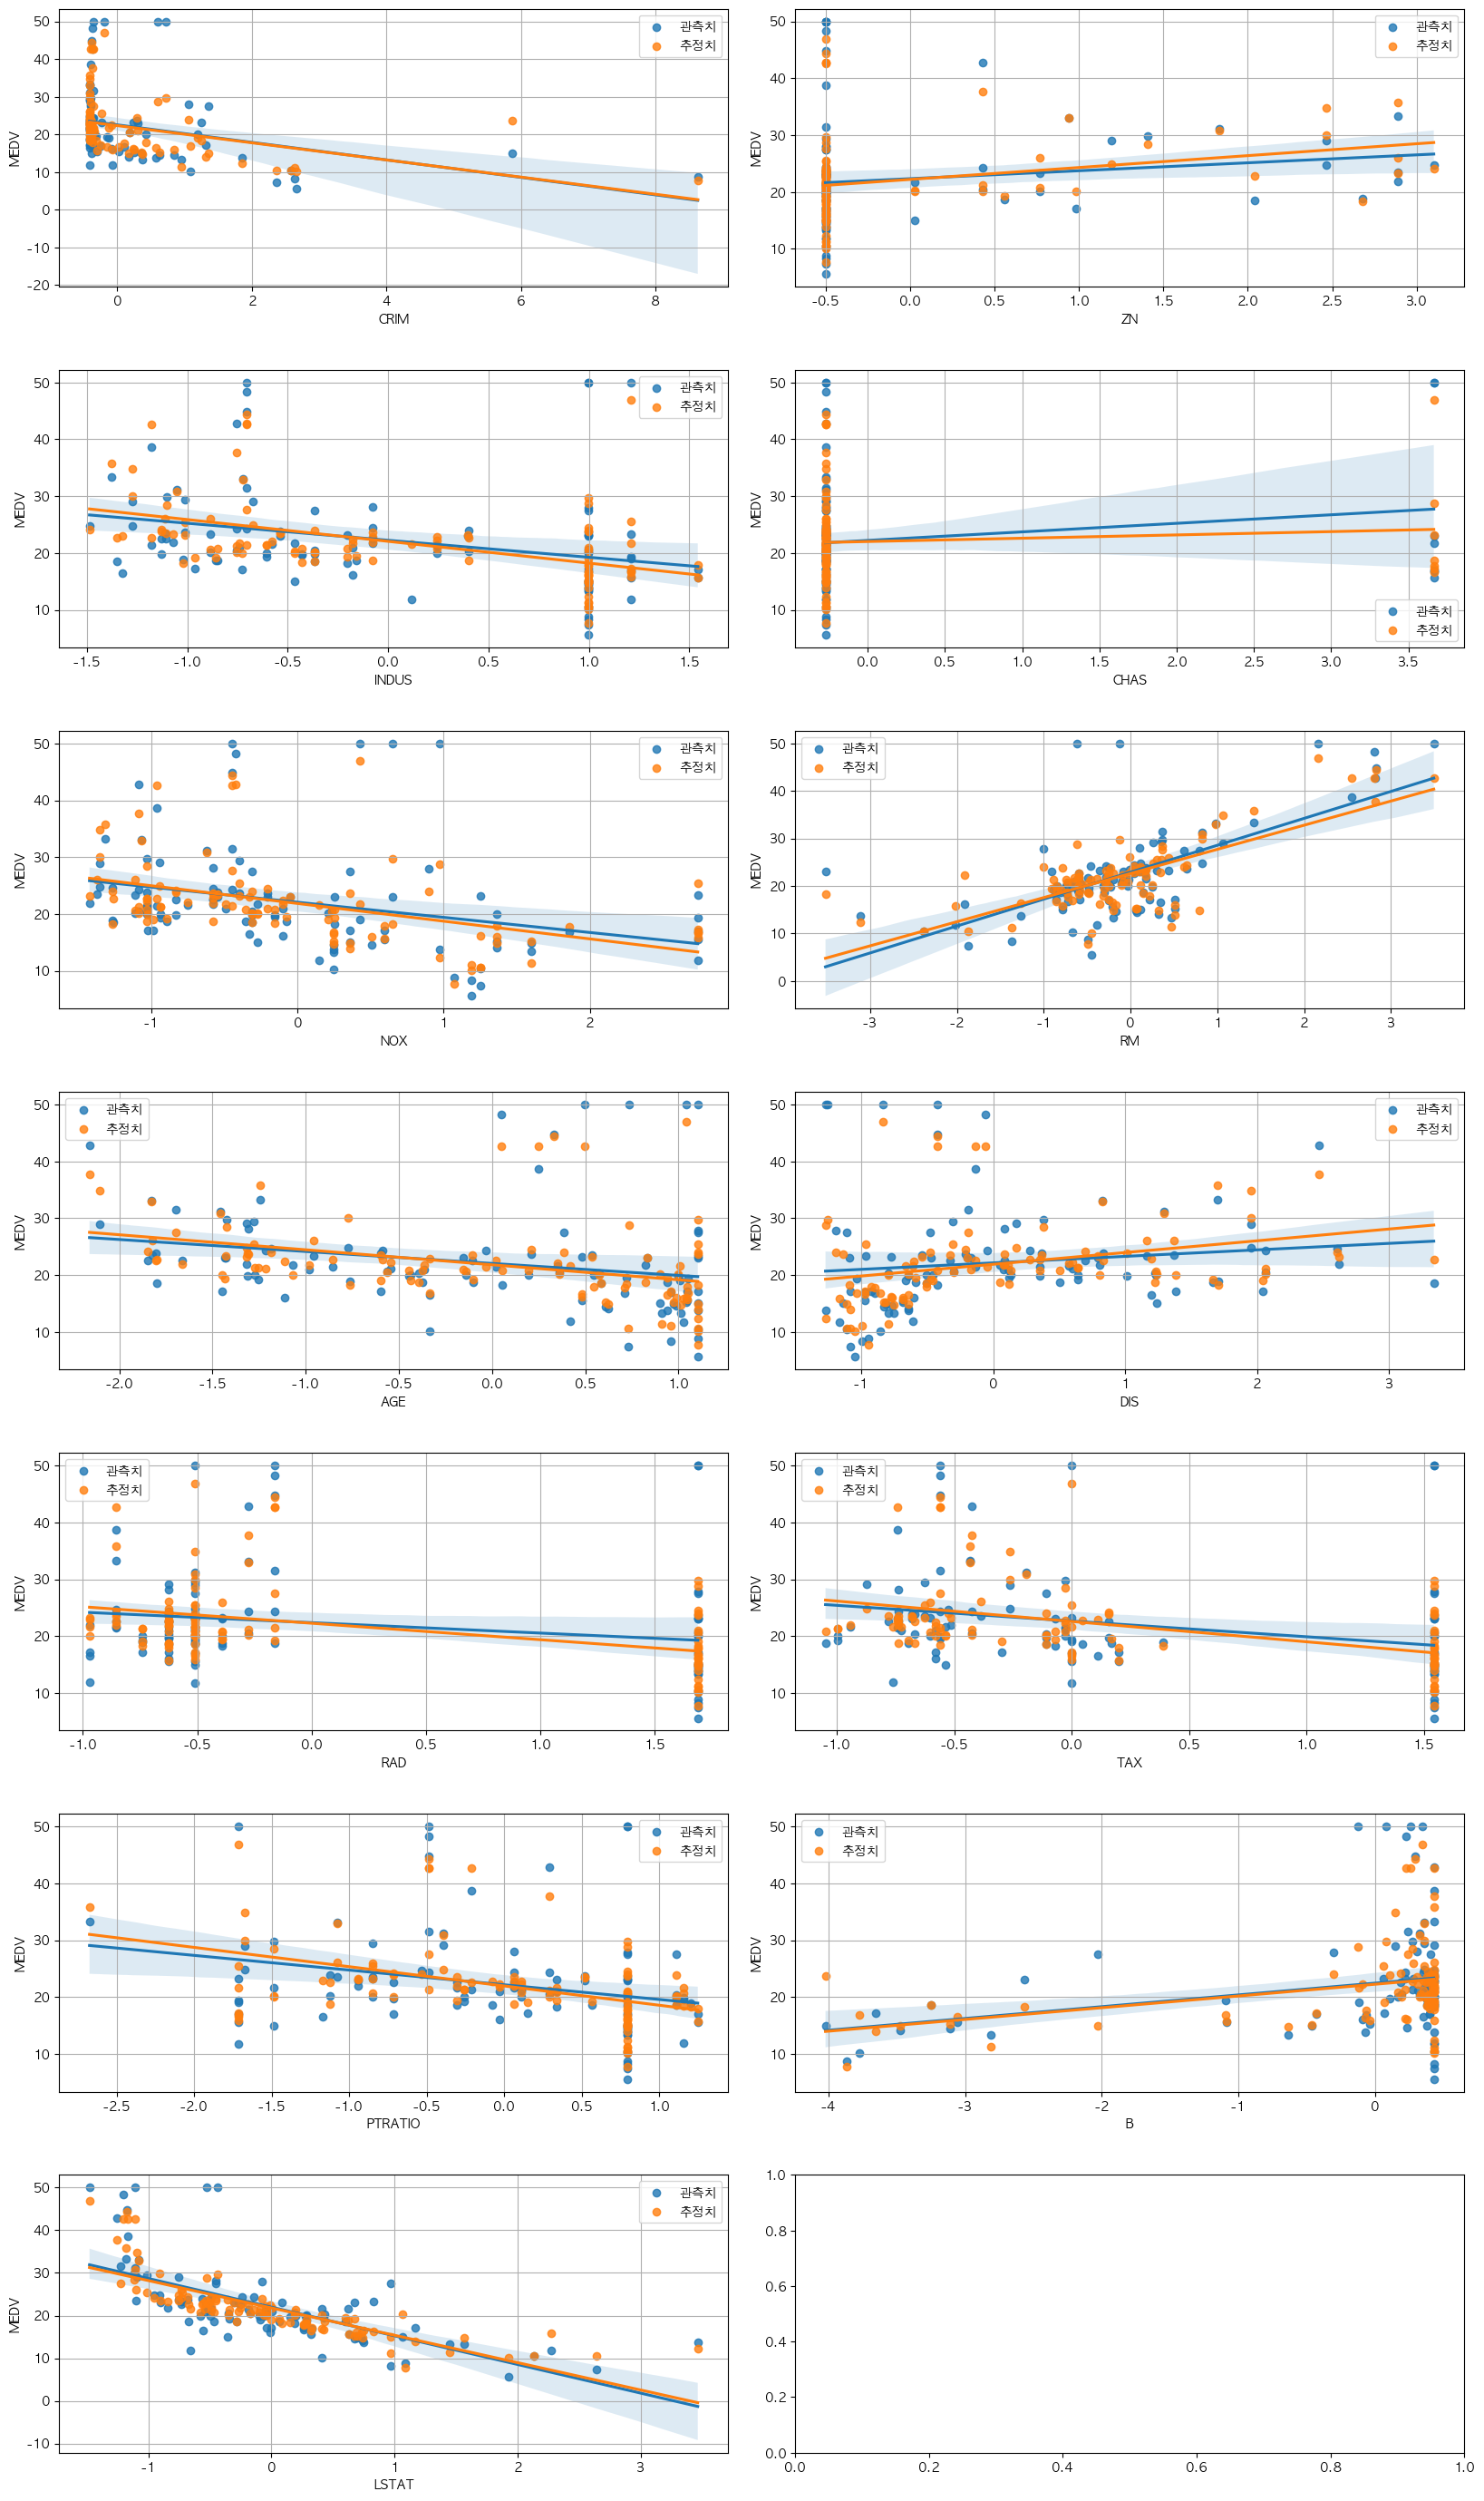

GradientBoostingRegressor(n_estimators=50, random_state=0, verbose=False)

In [5]:
my_gbm_regression(x_train, y_train, x_test, y_test)